In [1]:
import optuna
import plotly
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# from optuna.visualization import plot_contour
# from optuna.visualization import plot_edf
# from optuna.visualization import plot_intermediate_values
# from optuna.visualization import plot_optimization_history
# from optuna.visualization import plot_parallel_coordinate
# from optuna.visualization import plot_param_importances
# from optuna.visualization import plot_slice
print(plotly.__version__)  

5.18.0


In [2]:
study_names = ["HC_full_default", "HC_full_eqaulize", "HC_full_descendants", "HC_full_reachable_leaf_nodes", "HC_full_CE"]
studies = []

for study_name in study_names:
    db_url = f"sqlite:///database/{study_name}.db"
    study = optuna.load_study(study_name=study_name, storage=db_url)
    studies.append(study)

/tmp/ipykernel_40865/2273685101.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


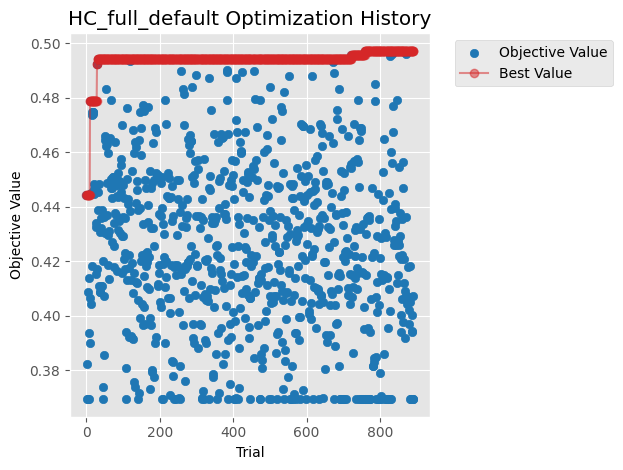

/tmp/ipykernel_40865/2273685101.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


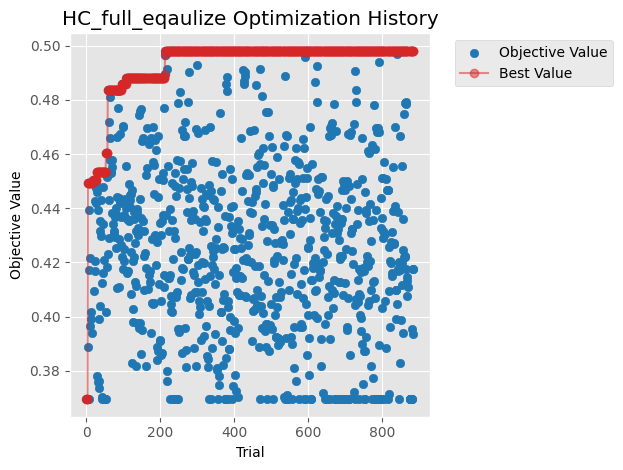

/tmp/ipykernel_40865/2273685101.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


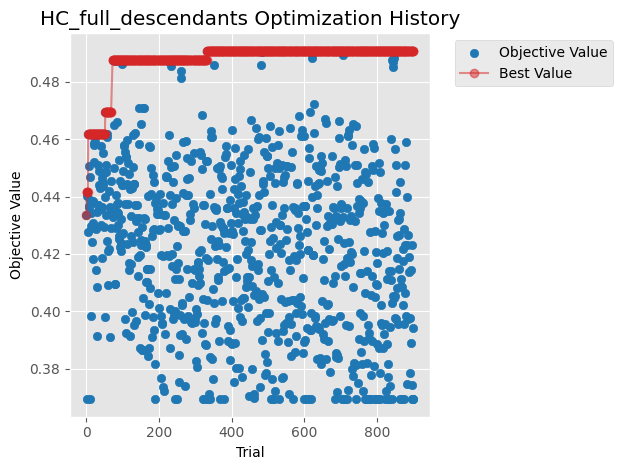

/tmp/ipykernel_40865/2273685101.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


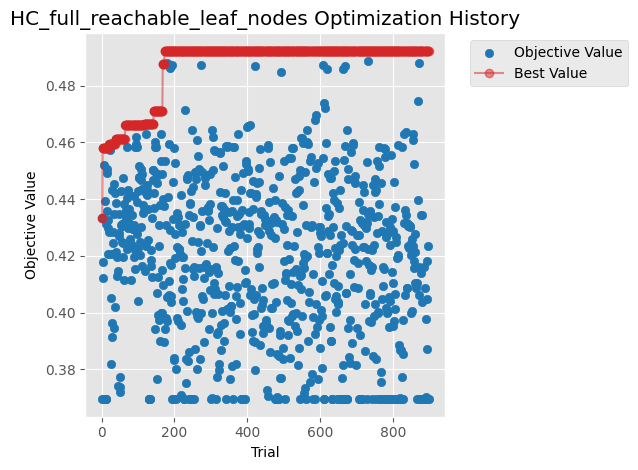

/tmp/ipykernel_40865/2273685101.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
[W 2023-10-31 15:46:33,649] There are no complete trials.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


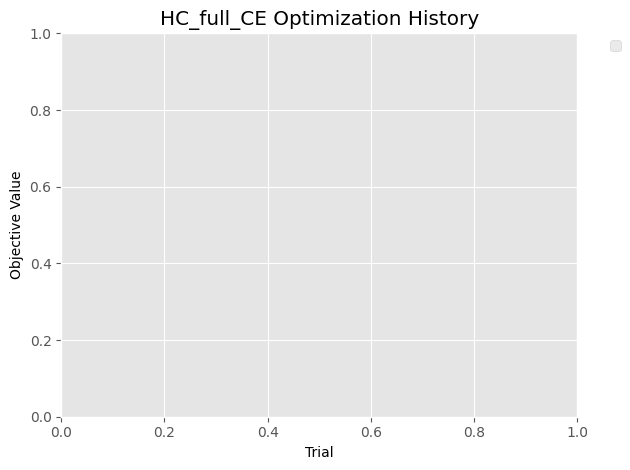

In [3]:
for i, study in enumerate(studies):
    optuna.visualization.matplotlib.plot_optimization_history(study)
    plt.tight_layout()
    plt.title(f"{study_names[i]} Optimization History")
    plt.show()

In [11]:
optuna.importance.get_param_importances(studies[0])

OrderedDict([('weight_decay', 1.0)])

In [35]:
# dir(studies[0].trials[0])
studies[0].trials[0]._trial_id

1

In [36]:
data = []
for trial in studies[0].trials:
    # Only completed trials will be considered
    if trial.state == optuna.trial.TrialState.COMPLETE:
        row = trial.params  # Hyperparameters
        row["objective_value"] = trial.value  # Performance value
        row["trial_id"] = trial._trial_id
        data.append(row)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

In [37]:
df.isna().sum()

learning_rate                    0
per_device_train_batch_size      2
weight_decay                     0
objective_value                  0
trial_id                         0
loss_weight_method             843
dtype: int64

In [38]:
idx = df.index[df['per_device_train_batch_size'].isna()]
idx

Int64Index([495, 756], dtype='int64')

In [39]:
df.loc[idx]

,learning_rate,per_device_train_batch_size,weight_decay,objective_value,trial_id,loss_weight_method
495,0.000922,NaN,0.000004,0.394093,524,NaN
756,0.000060,NaN,0.000006,0.369427,797,NaN


In [41]:
df.loc[:10]

,learning_rate,per_device_train_batch_size,weight_decay,objective_value,trial_id,loss_weight_method
0,0.002445,5.0,0.000013,0.444468,1,NaN
1,0.000627,1.0,0.000976,0.369429,3,NaN
2,0.000090,12.0,0.000004,0.382426,4,NaN
3,0.009398,1.0,0.001813,0.408929,5,NaN
4,0.000013,10.0,0.000918,0.369427,6,NaN
5,0.000593,8.0,0.000032,0.413982,7,NaN
6,0.001649,1.0,0.002868,0.393803,8,NaN
7,0.000020,9.0,0.000035,0.369427,9,NaN
8,0.000204,9.0,0.000086,0.389952,10,NaN
9,0.003385,19.0,0.000009,0.478593,11,NaN


In [42]:
data = []
for trial in studies[1].trials:
    # Only completed trials will be considered
    if trial.state == optuna.trial.TrialState.COMPLETE:
        row = trial.params  # Hyperparameters
        row["objective_value"] = trial.value  # Performance value
        row["trial_id"] = trial._trial_id
        data.append(row)

# Convert the data to a Pandas DataFrame
df2 = pd.DataFrame(data)
df2.isna().sum()

learning_rate                  1
per_device_train_batch_size    0
weight_decay                   0
objective_value                0
trial_id                       0
dtype: int64

In [46]:
idx = df2.index[df2['learning_rate'].isna()]
df2.loc[idx]

,learning_rate,per_device_train_batch_size,weight_decay,objective_value,trial_id
139,NaN,19,0.000054,0.474488,143


In [50]:
args = {"data_dir": 'dataset_'}

data_files = {
        'train': f"{args['data_dir']}/train_data.csv",
        'validation': f"{args['data_dir']}/val_data.csv",
        'test': f"{args['data_dir']}/test_data.csv"
    }

In [27]:
data = []
for trial in studies[2].trials:
    # Only completed trials will be considered
    if trial.state == optuna.trial.TrialState.COMPLETE:
        row = trial.params  # Hyperparameters
        row["objective_value"] = trial.value  # Performance value
        data.append(row)

# Convert the data to a Pandas DataFrame
df3 = pd.DataFrame(data)
df3.isna().sum()

learning_rate                  0
per_device_train_batch_size    1
weight_decay                   0
objective_value                0
dtype: int64

In [28]:
data = []
for trial in studies[3].trials:
    # Only completed trials will be considered
    if trial.state == optuna.trial.TrialState.COMPLETE:
        row = trial.params  # Hyperparameters
        row["objective_value"] = trial.value  # Performance value
        data.append(row)

# Convert the data to a Pandas DataFrame
df4 = pd.DataFrame(data)
df4.isna().sum()

learning_rate                    0
per_device_train_batch_size      0
weight_decay                     0
objective_value                  0
loss_weight_method             846
dtype: int64

/tmp/ipykernel_40865/3243345593.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


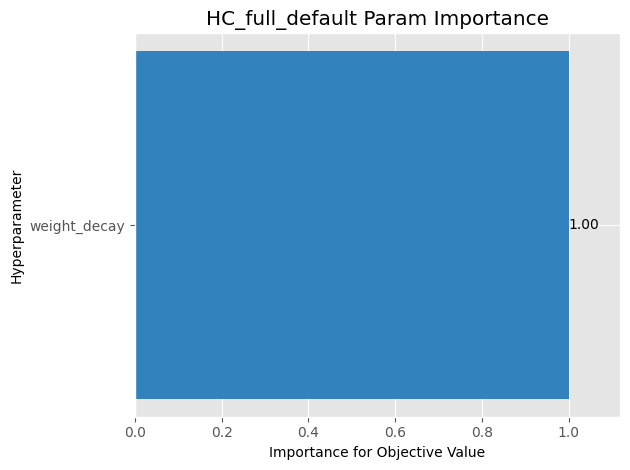

/tmp/ipykernel_40865/3243345593.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


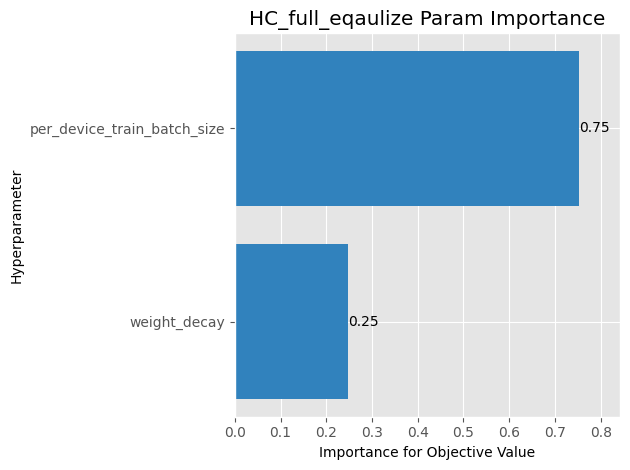

/tmp/ipykernel_40865/3243345593.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


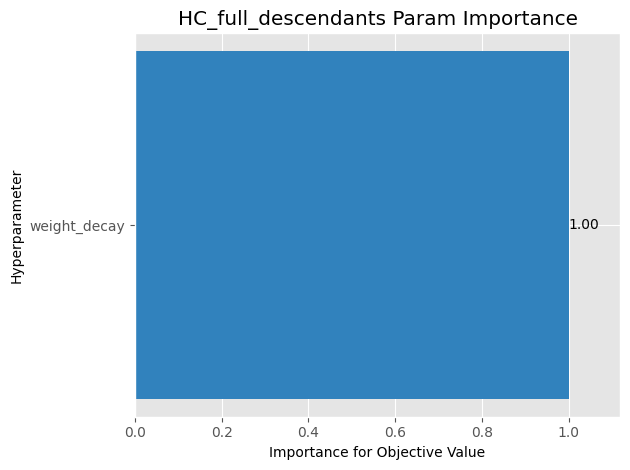

/tmp/ipykernel_40865/3243345593.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


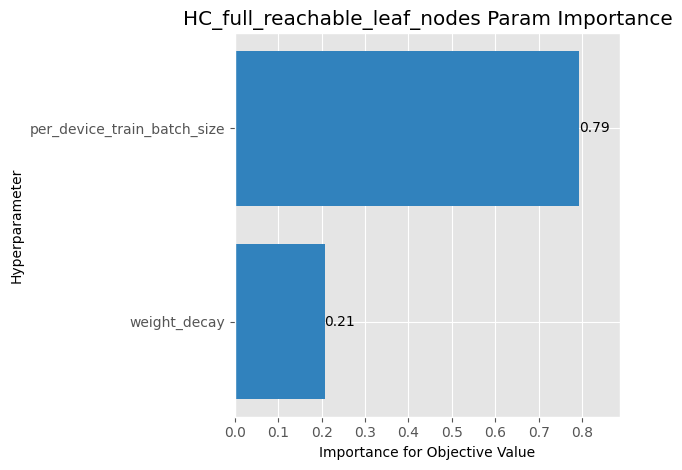

/tmp/ipykernel_40865/3243345593.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)
[W 2023-10-31 15:47:22,815] Study instance does not contain completed trials.


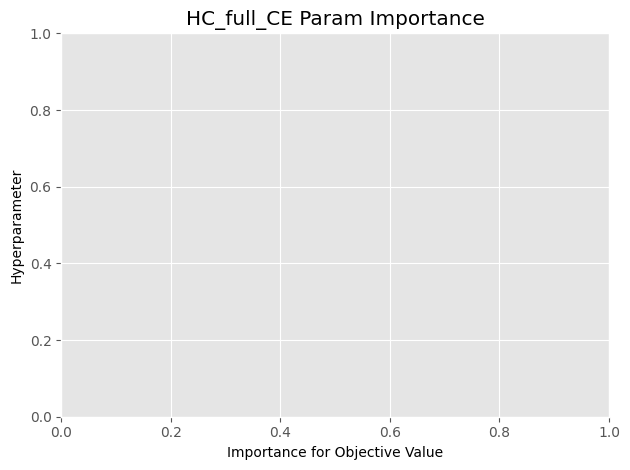

In [4]:
for i, study in enumerate(studies):
    optuna.visualization.matplotlib.plot_param_importances(study)
    plt.tight_layout()
    plt.title(f"{study_names[i]} Param Importance")
    plt.show()

# optuna.visualization.matplotlib.plot_param_importances(study)
# plt.show()

# sns.set_theme()
# sns.set_style("whitegrid")
# x = optuna.visualization.matplotlib.plot_param_importances(study_eqaulize)

# plt.tight_layout()
# plt.savefig('hpo_importance.png')
# plt.show()

/tmp/ipykernel_40865/308402206.py:4: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/home/jeon_su/.conda/envs/myenv/lib/python3.10/site-packages/optuna/visualization/matplotlib/_slice.py:141: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_40865/308402206.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


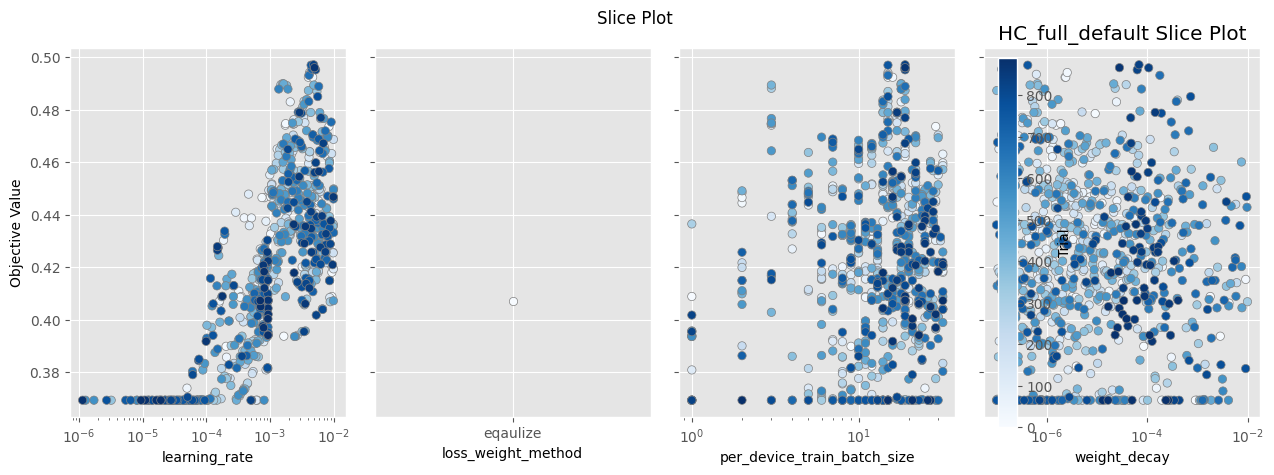

/tmp/ipykernel_40865/308402206.py:4: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_40865/308402206.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


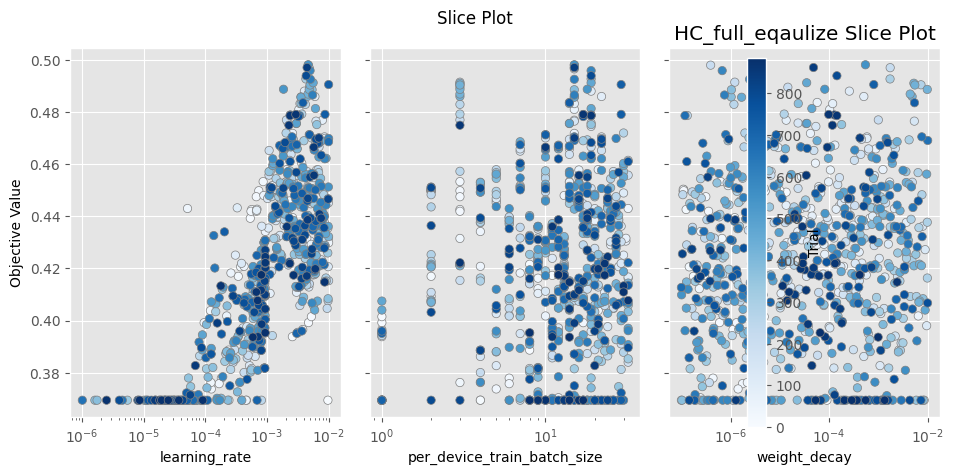

/tmp/ipykernel_40865/308402206.py:4: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipykernel_40865/308402206.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


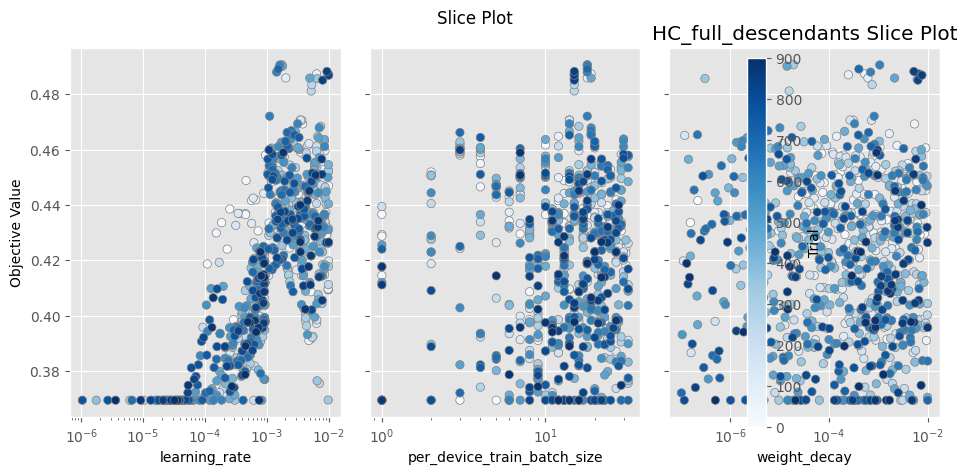

/tmp/ipykernel_40865/308402206.py:4: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/home/jeon_su/.conda/envs/myenv/lib/python3.10/site-packages/optuna/visualization/matplotlib/_slice.py:141: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_40865/308402206.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


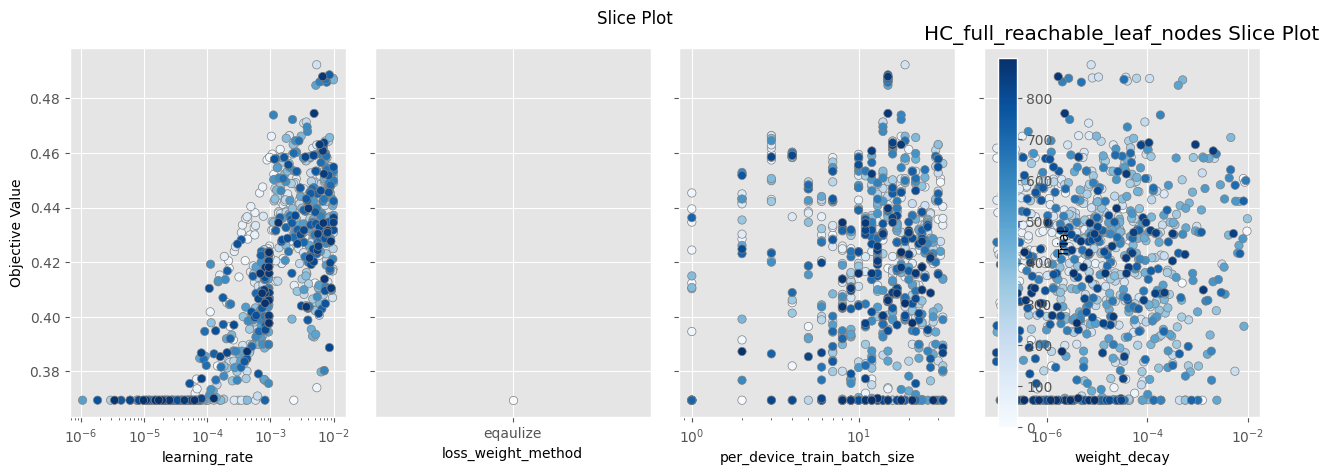

/tmp/ipykernel_40865/308402206.py:4: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
[W 2023-10-31 15:47:28,182] Your study does not have any completed trials.


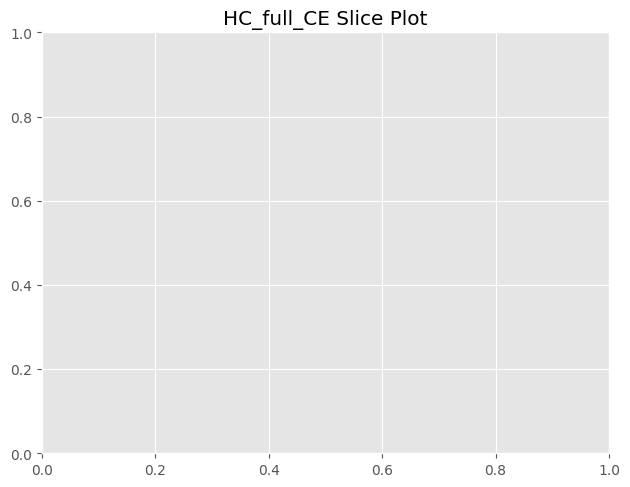

In [5]:
# Slice Plot

for i, study in enumerate(studies):
    optuna.visualization.matplotlib.plot_slice(study)
    plt.tight_layout()
    plt.title(f"{study_names[i]} Slice Plot")
    plt.show()

# optuna.visualization.matplotlib.plot_slice(study)
# plt.show()

In [6]:
n_best_trials = 3  # Number of best trials to show

# Get all the trials sorted by their completed values
all_trials = study.trials_dataframe()
sorted_trials = all_trials.sort_values("value", ascending=study.direction == "maximize")

# Print the best n trials
print(f"Top {n_best_trials} Trials:")
print(sorted_trials.head(n_best_trials))

Top 3 Trials:
   number value             datetime_start          datetime_complete  \
0       0  None 2023-10-30 00:31:47.073451 2023-10-30 00:36:09.180986   
1       1  None 2023-10-30 00:33:11.861364 2023-10-30 00:41:09.806087   
2       2  None 2023-10-30 00:36:48.160204 2023-10-30 00:45:25.886705   

                duration  params_learning_rate params_loss_weight_method  \
0 0 days 00:04:22.107535              0.000037                       NaN   
1 0 days 00:07:57.944723              0.000040                       NaN   
2 0 days 00:08:37.726501              0.000046                       NaN   

   params_per_device_train_batch_size  params_weight_decay state  
0                                  32         3.165664e-06  FAIL  
1                                   1         1.706681e-07  FAIL  
2                                   1         5.302711e-04  FAIL  


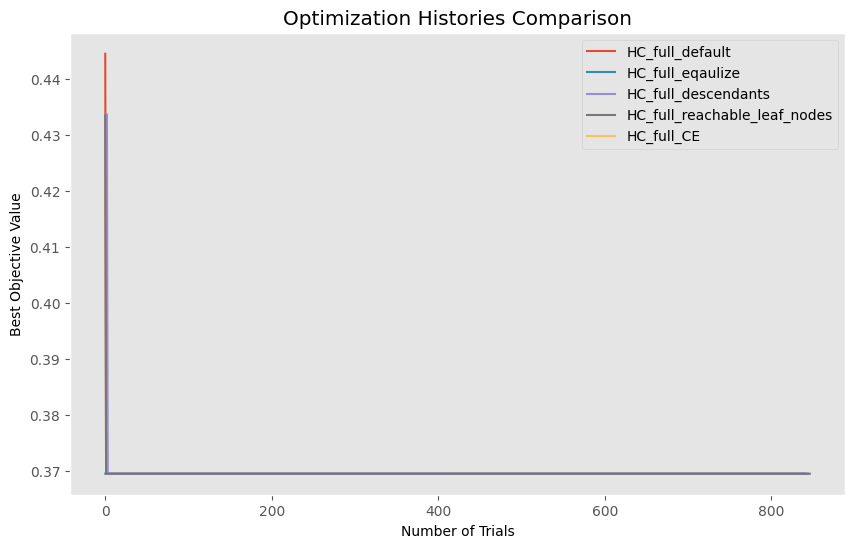

In [7]:
import matplotlib.pyplot as plt

def plot_optimization_histories(studies, study_names):
    plt.figure(figsize=(10, 6))

    for study, name in zip(studies, study_names):
        trials = study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
        best_values = [float('inf')] * len(trials)
        for i, trial in enumerate(sorted(trials, key=lambda x: x.number)):
            if i > 0:
                best_values[i] = min(best_values[i - 1], trial.value)
            else:
                best_values[i] = trial.value
        
        plt.plot(best_values, label=name)

    plt.title("Optimization Histories Comparison")
    plt.xlabel("Number of Trials")
    plt.ylabel("Best Objective Value")
    plt.legend()
    plt.grid()
    plt.show()

plot_optimization_histories(studies, study_names)


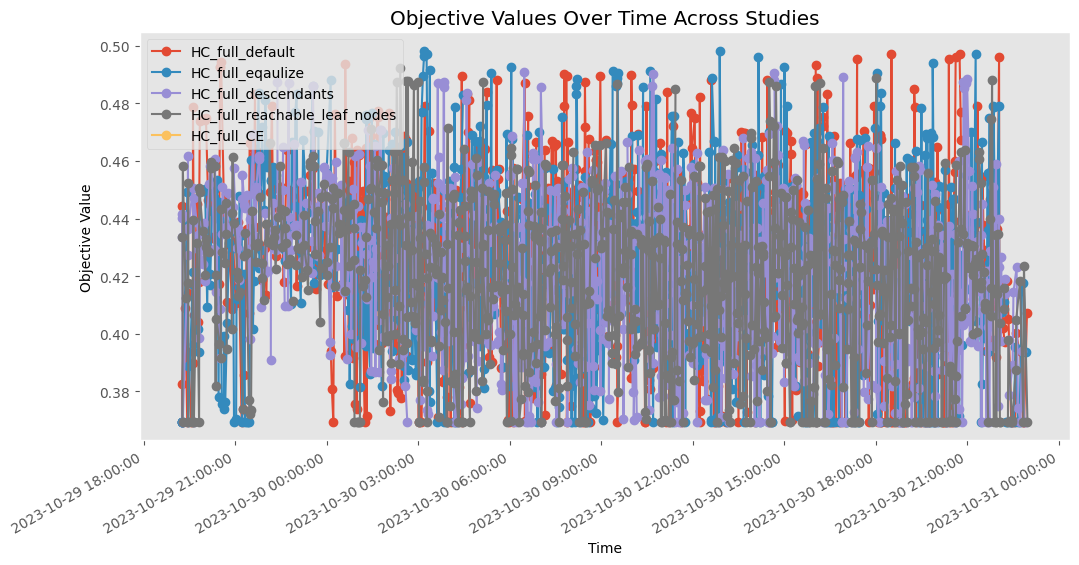

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_values_over_time(studies, study_names):
    plt.figure(figsize=(12, 6))
    
    for study, name in zip(studies, study_names):
        trial_timestamps = [datetime.fromtimestamp(trial.datetime_start.timestamp()) for trial in study.trials]
        trial_values = [trial.value for trial in study.trials]

        plt.plot(trial_timestamps, trial_values, marker='o', label=name)

    # Formatting the plot
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()  # Rotation

    plt.title("Objective Values Over Time Across Studies")
    plt.xlabel("Time")
    plt.ylabel("Objective Value")
    plt.legend()
    plt.grid()
    plt.show()

plot_values_over_time(studies, study_names)


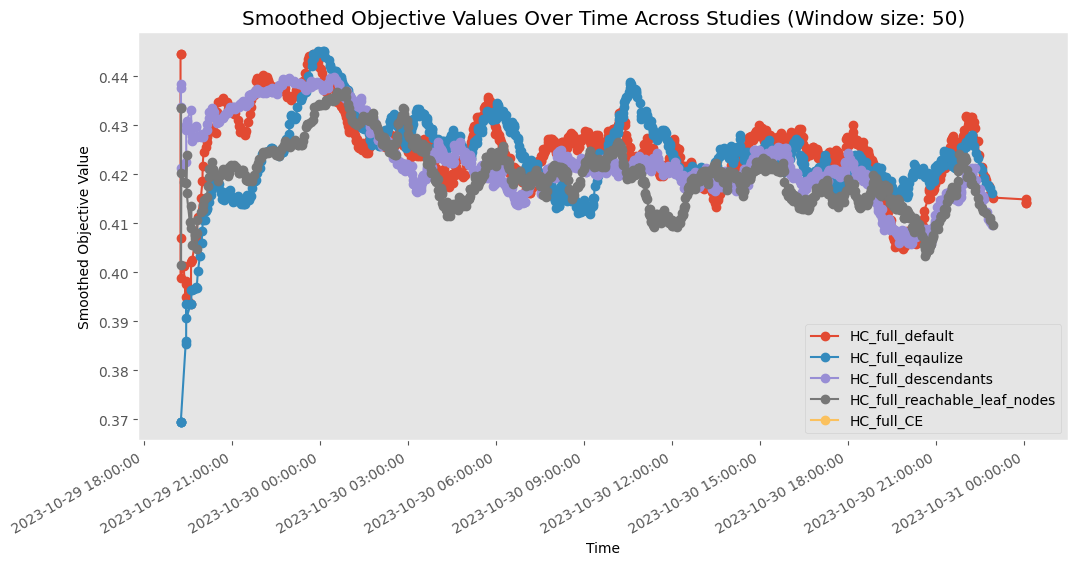

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

def smooth_values(values, window_size):
    """Apply a simple moving average smoothing."""
    return pd.Series(values).rolling(window=window_size, min_periods=1).mean().tolist()

def plot_values_over_time_with_smoothing(studies, study_names, window_size=3):
    plt.figure(figsize=(12, 6))
    
    for study, name in zip(studies, study_names):
        trial_timestamps = [datetime.fromtimestamp(trial.datetime_start.timestamp()) for trial in study.trials]
        trial_values = [trial.value for trial in study.trials]
        
        # Apply smoothing
        smoothed_values = smooth_values(trial_values, window_size)

        plt.plot(trial_timestamps, smoothed_values, marker='o', label=name)

    # Formatting the plot
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()  # Rotation

    plt.title(f"Smoothed Objective Values Over Time Across Studies (Window size: {window_size})")
    plt.xlabel("Time")
    plt.ylabel("Smoothed Objective Value")
    plt.legend()
    plt.grid()
    plt.show()

plot_values_over_time_with_smoothing(studies, study_names,window_size=50)


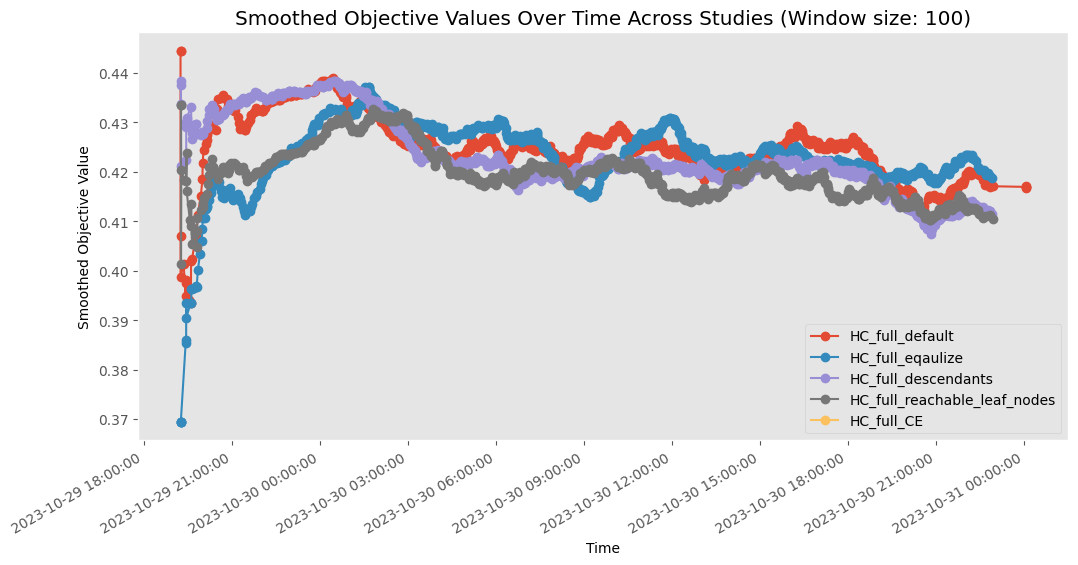

In [10]:
plot_values_over_time_with_smoothing(studies, study_names,window_size=100)